# Experiment 1

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import json

class data_storage:
    b = np.array([]);
    l = np.array([]);
    t = np.array([]);
    v = np.array([]);
    d = np.array([]);
    g = np.array([]);
    s = np.array([]);
    c = np.array([]);

def extract_data( TXTpath ):
    X = data_storage()
    Cb = 0;
    Ct = 0;
    with open(TXTpath) as f:
        line = f.readline()
        while line:
            line = f.readline()
            if( line[0:2] == ".b" ):
                Cb+=1;
                X.b = np.append(X.b, int(line[2:]))
            if( line[0:2] == ".g" ):
                X.g = np.append(X.g, int(line[3:]))        
            if( line[0:2] == ".s" ):
                X.s = np.append(X.s, int(line[3:]))
            if( line[0:2] == ".c" ):
                X.c = np.append(X.c, float(line[3:]))
            if( line[0:2] == ".d" ):
                X.d = np.append(X.d, int(line[3:]))
            if( line[0:2] == ".l" ):
                X.l = np.append(X.l,float(line[3:]))
            if( line[0:2] == ".t" ):
                Ct+=1;
                X.t = np.append(X.t,float(line[3:]))
                if( Cb != Ct ):
                    print(X.b[Cb-1])
            if( line[0:2] == ".v" ):
                X.v = np.append(X.v,float(line[3:]))
            
    return X
    
D1 = extract_data( 'DK_XTSD/RES/summary.txt' )
D0 = extract_data( 'MUESLI/RES/summary.txt' )
D2 = extract_data( 'AR_MUESLI/RES/summary.txt' )
D3 = extract_data( 'VOTER3/RES/summary.txt' )
D4 = extract_data( 'AR3_MUESLI/RES/summary.txt' )
D5 = extract_data( 'VOTER5/RES/summary.txt' )
D6 = extract_data( 'AR5_MUESLI/RES/summary.txt' )
##D3 = extract_data( 'DK_XTSD/RES/summary.txt' )
#D4 = extract_data( 'DK_DSD/RES/summary.txt' )
#D5 = extract_data( 'DK_RDSD/RES/summary.txt' )
#D4 = extract_data( 'dcsdec/RES/summary.txt' )D5 = extract_data( 'dcxsdec/RES/summary.txt' )
#D6 = extract_data( 'idsdS0d001/RES/summary.txt' )
#D7 = extract_data( 'idsdS0d1/RES/summary.txt' )
#D7 = extract_data( 'idsdS/RES/summary.txt' )
#D8 = extract_data( 'iedsdS/RES/summary.txt' )
#D3r = [D3j[0]["entries"][j]["runtime"] for j in range(0,99,1)]
#D4r = [D4j[0]["entries"][j]["runtime"] for j in range(0,99,1)]
#D5r = [D5j[0]["entries"][j]["runtime"] for j in range(0,99,1)]


In [6]:
from tabulate import tabulate
def extract_row_data( X, label ):
    return [label, np.mean(X.l),np.mean(X.t), np.mean(X.g), np.mean(X.d), np.mean(X.v-X.t), np.mean(X.c)]

row0 = extract_row_data( D0, "MUESLI")
row1 = extract_row_data( D1, "DK-IXTSD")
row2 = extract_row_data( D2, "AR-MUESKI")
row3 = extract_row_data( D3, "VOTER3")
row4 = extract_row_data( D4, "AR3_MUESLI")
row5 = extract_row_data( D5, "VOTER5")
row6 = extract_row_data( D6, "AR5_MUESLI")
#row4 = extract_row_data( D4, D4r, "DK-DSD")
#row5 = extract_row_data( D5, D5r, "IDSD.01")
#row6 = extract_row_data( D6, D6r, "IDSD.001")
#row7 = extract_row_data( D7, D7r, "IDSD")
#row8 = extract_row_data( D8, D8r, "IEDSD")

#row5 = extract_row_data( dcIDSD, runtimedcIDSD, "dcIDSD" )

#row2 = ["I-DSD",np.mean(t2), np.mean(g2), np.mean(s2), np.mean(d2), np.mean(np.abs(t2-v2))];
table = [ row0, row1, row2, row3,row4, row5, row6]#row4, row5, row6, row7, row8 ] #row2
print(tabulate(table, headers = ["method","train accuracy[%]","test accuracy[%]","And gates","levels","overfit[%]","time[s]"], tablefmt="github"))

| method     |   train accuracy[%] |   test accuracy[%] |   And gates |   levels |   overfit[%] |   time[s] |
|------------|---------------------|--------------------|-------------|----------|--------------|-----------|
| MUESLI     |             80.0983 |            78.3681 |       94.9  |    32.05 |    -0.024064 |  30.0628  |
| DK-IXTSD   |             99.9964 |            81.0433 |      840.54 |    25.66 |     0.101249 |   1.29053 |
| AR-MUESKI  |             99.9964 |            82.492  |      837.95 |    53.99 |     0.052033 |  31.1452  |
| VOTER3     |             99.9963 |            82.9587 |      957.13 |    40.34 |     0.020003 |   3.64636 |
| AR3_MUESLI |             99.9964 |            83.5706 |      944.54 |    61.8  |     0.081094 |  32.6017  |
| VOTER5     |             99.9964 |            82.9155 |     1048.84 |    50.6  |     0.068284 |   5.15337 |
| AR5_MUESLI |             99.9963 |            83.6216 |     1041.39 |    71.19 |     0.083287 |  31.4161  |


NameError: name 'D8' is not defined

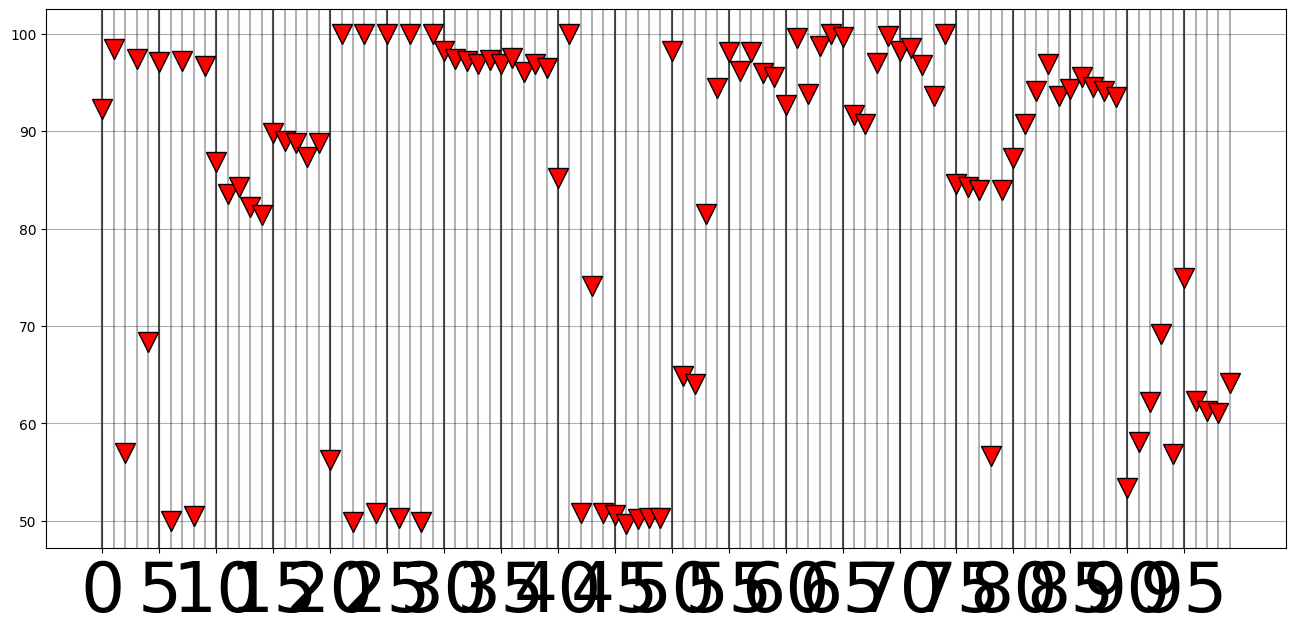

In [4]:
#import matplotlib.font_manager

fig = plt.figure(figsize=(16,7))
ax = plt.gca()
plt.xticks(range(0,100,5), fontsize=50)
for b in range(0,100,1):
    plt.axvline(x=b, color='k', alpha = 0.3)
for b in range(0,100,5):
    plt.axvline(x=b, color='k', alpha = 0.5)
plt.grid()
#lineSD, = ax.plot(SD.b, SD.t , 's', c='#0aff02', alpha=1, markeredgecolor='k', markersize = 20, label = 'SD')
#lineISD, = ax.plot(ISD.b, ISD.t , 'D', c='blue', alpha=1, markeredgecolor='k', markersize = 18 , label = 'ISD')
#lineIDSD, = ax.plot(IDSD.b, IDSD.t, 'o', c='white', alpha=1, markeredgecolor='k', markersize = 16, label = 'IDSD')
#linearMUESLI, = ax.plot(arMUESLI.b, arMUESLI.t, '*', c='red', alpha=1, markeredgecolor='k', markersize = 15, label = 'arMUESLI')
#linedcIDSD, = ax.plot(dcIDSD.b, dcIDSD.t, 'P', c='k', alpha=1, markeredgecolor='k', markersize = 11, label = 'dcDSD')
#lineRASS, = ax.plot(rass.b, rass.t, 'o', c='gold', alpha=1, markeredgecolor='k', markersize = 11, label = 'dcDSD')

#line0, = ax.plot(D0.b, D0.t , 's', c='#0aff02', alpha=1, markeredgecolor='k', markersize = 20, label = 'SD')
#line1, = ax.plot(D2.b, D2.t , 'D', c='blue', alpha=1, markeredgecolor='k', markersize = 18 , label = 'ITSD')
#line2, = ax.plot(D3.b, D2.t , 'v', c='white', alpha=1, markeredgecolor='k', markersize = 16 , label = 'ITSD')
line3, = ax.plot(D3.b, D3.t , 'v', c='red', alpha=1, markeredgecolor='k', markersize = 14 , label = 'IXTSD')
#line4, = ax.plot(D4.b, D4.t , 'x', c='red', alpha=1, markeredgecolor='k', markersize = 14 , label = 'IDSDp')
line8, = ax.plot(D8.b, D8.t , 'x', c='red', alpha=1, markeredgecolor='k', markersize = 14 , label = 'IDSD')

ax.legend( handles = [ line3,line8 ], fontsize=15, bbox_to_anchor=(0.09, 0.75, 0.04, .102)) #,

plt.rcParams["font.family"] = "sans"
plt.xlabel('Benchmark', fontsize=30)
plt.ylabel('Accuracy[%]', fontsize=30)
plt.title('Test Accuracy', fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('acc.png')

In [10]:
print(np.mean((D4.t-D1.t)/D1.t))
print(np.mean((D4.d-D1.d)/D1.d))
print(np.mean((D4.g-D1.g)/D1.g))

0.011164758714160526
-0.12027950318533166
-0.1738352600928506


NameError: name 'D0' is not defined

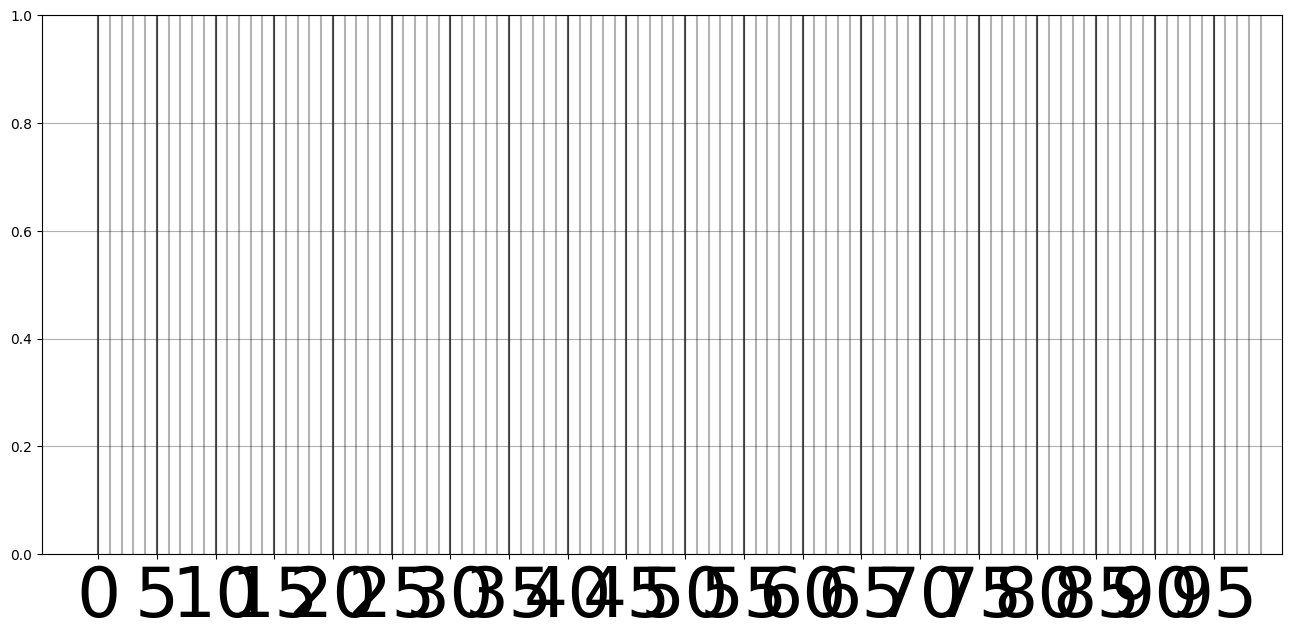

In [29]:
#import matplotlib.font_manager

fig = plt.figure(figsize=(16,7))
ax = plt.gca()
plt.xticks(range(0,100,5), fontsize=50)
for b in range(0,100,1):
    plt.axvline(x=b, color='k', alpha = 0.3)
for b in range(0,100,5):
    plt.axvline(x=b, color='k', alpha = 0.5)
plt.grid()
#lineSD, = ax.plot(SD.b, SD.t , 's', c='#0aff02', alpha=1, markeredgecolor='k', markersize = 20, label = 'SD')
#lineISD, = ax.plot(ISD.b, ISD.t , 'D', c='blue', alpha=1, markeredgecolor='k', markersize = 18 , label = 'ISD')
#lineIDSD, = ax.plot(IDSD.b, IDSD.t, 'o', c='white', alpha=1, markeredgecolor='k', markersize = 16, label = 'IDSD')
#linearMUESLI, = ax.plot(arMUESLI.b, arMUESLI.t, '*', c='red', alpha=1, markeredgecolor='k', markersize = 15, label = 'arMUESLI')
#linedcIDSD, = ax.plot(dcIDSD.b, dcIDSD.t, 'P', c='k', alpha=1, markeredgecolor='k', markersize = 11, label = 'dcDSD')
#lineRASS, = ax.plot(rass.b, rass.t, 'o', c='gold', alpha=1, markeredgecolor='k', markersize = 11, label = 'dcDSD')

line0, = ax.plot(D0.b, D0.t , 's', c='blue', alpha=1, markeredgecolor='k', markersize = 20, label = 'SD')
line1, = ax.plot(D4.b, D4.t , 'D', c='#0aff02', alpha=1, markeredgecolor='k', markersize = 18 , label = 'DCTSD')
line2, = ax.plot(D5.b, D5.t , 'v', c='cyan', alpha=1, markeredgecolor='k', markersize = 16 , label = 'DCXTSD')
line3, = ax.plot(D2.b, D2.t , 'o', c='gold', alpha=1, markeredgecolor='k', markersize = 16 , label = 'ITSD')
line4, = ax.plot(D3.b, D3.t , '*', c='red', alpha=1, markeredgecolor='k', markersize = 14 , label = 'IXTSD')
#line6, = ax.plot(D6.b, D3.t , '*', c='red', alpha=1, markeredgecolor='k', markersize = 14 , label = 'IXTSD')

ax.legend( handles = [line0, line1, line2, line3, line4 ], fontsize=15, bbox_to_anchor=(0.09, 0.75, 0.04, .102)) #,

plt.rcParams["font.family"] = "sans"
plt.xlabel('Benchmark', fontsize=30)
plt.ylabel('Accuracy[%]', fontsize=30)
plt.title('Test Accuracy', fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('acc.png')

# Experiment 2